# Anomaly Detection of Retail Store Sales

Anomaly detection is the identification of outliers or rare event items in a dataset that potentially exhibit abnormal behavior or properties as compared to the rest of the datapoints.

There are a wide variety of anomaly detection methods including supervised, unsupervised and semi-supervised. Typically we can perform anomaly detection on univariate data, multivariate data as well as data which is temporal in nature. In this mini-project we have leveraged state-of-the-art anomaly detection models from frameworks like [__`scikit-learn`__](https://scikit-learn.org/stable/modules/outlier_detection.html) and [__`PyOD`__](https://pyod.readthedocs.io/en/latest/index.html).


In this project we have successfully applied these techniques to find out potential outliers pertaining to sales transactional data in a retail store dataset and also understood how to visualize outliers similar to the following plot.

![](outlier_ex.png)

Performing anomaly detection on both univariate and multivariate data and leverage the following anomaly detection techniques.

- Simple Statistical Models (mean & standard deviation: the three-sigma rule)
- Isolation Forest
- Clustering-Based Local Outlier Factor
- Auto-encoders

# 1. Getting and Loading the Dataset

The first step towards solving any data science or machine learning problem is to obtain the necessary data. In this scenario, we will be dealing with a popular retail dataset known as the [SuperStore Sales Dataset](https://community.tableau.com/docs/DOC-1236) which consists of transactional data pertaining to a retail store.

#### Please download the required dataset from [here](https://community.tableau.com/docs/DOC-1236) if necessary, although it will also be provided to you along with this notebook for this mini-project

Once we have the necessary data, we will load up the dataset and perform some initial exploratory data analysis

# 2. Exploratory Data Analysis



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


df = pd.read_excel("Superstore.xls")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

We don't have any major missing values in our dataset and we can now look at a sample subset of the data

In [2]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Visualize Sales vs. Order Date 



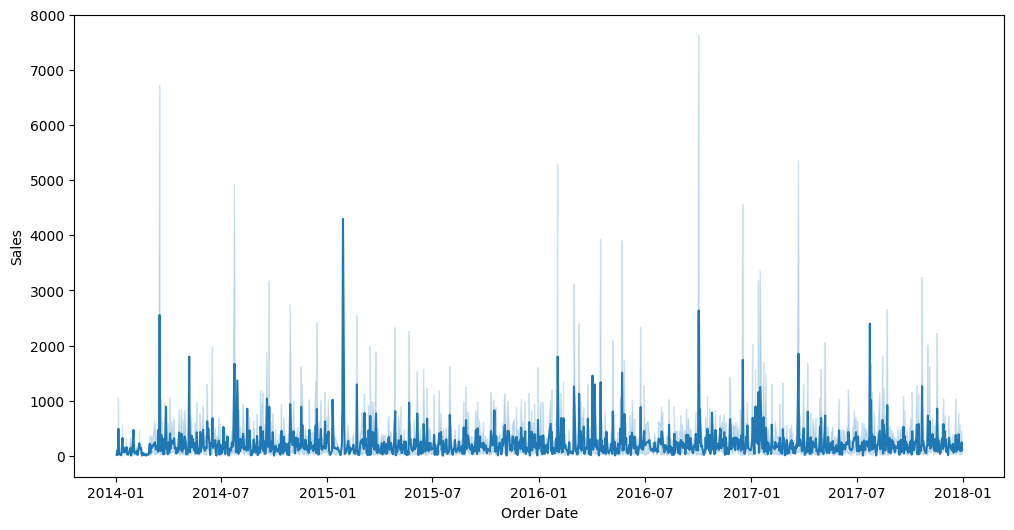

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.lineplot(x=df['Order Date'], y=df['Sales']);

## Visualize Sales Distribution




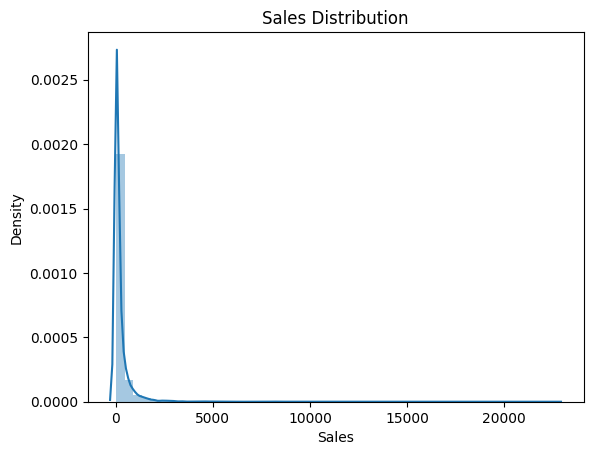

In [4]:
sns.distplot(df['Sales'])
plt.title("Sales Distribution");

In [5]:
df['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

We can definitely see the presence of potential outliers in terms of the min or max values as compared to the meat of the distribution in the interquartile range as observed in the distribution statistics

## Q 2.1: Visualize Profit vs. Order Date 





Text(0, 0.5, 'Profit')

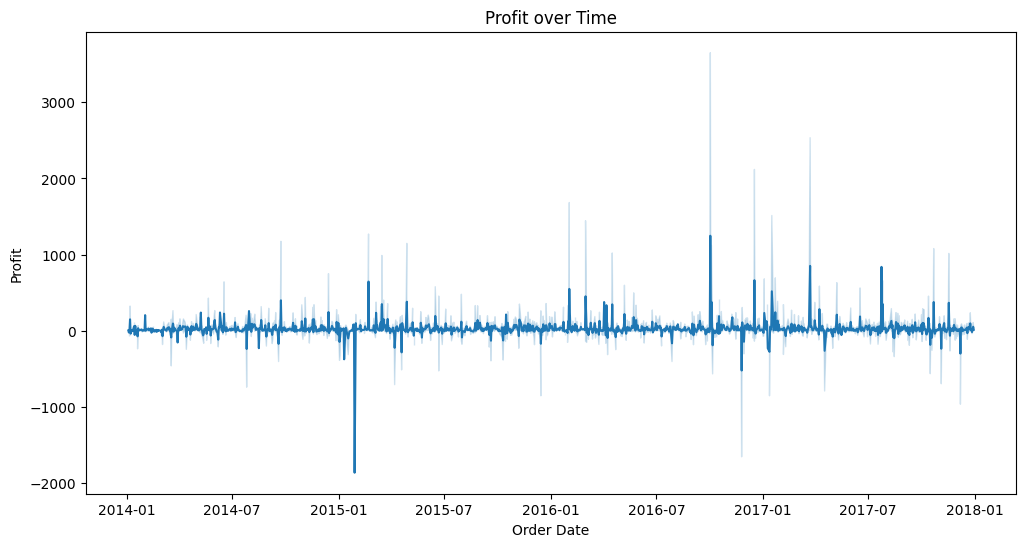

In [44]:
# Plot Order Date vs. Profit using a line plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x='Order Date', y='Profit', data=df)
plt.title('Profit over Time')
plt.xlabel('Order Date')
plt.ylabel('Profit')


## Q 2.2: Visualize Profit Distribution



Text(0.5, 1.0, 'Profit Distribution')

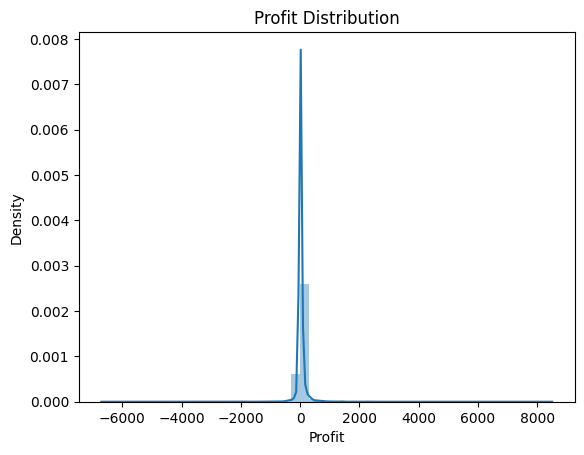

In [7]:
# Plot the distribution for Profit
sns.distplot(df['Profit'])
plt.title('Profit Distribution')


__Your turn: Get the essential descriptive statistics for `Profit` using an appropriate function__

In [8]:
# Get the essential descriptive statistics for Profit
df['Profit'].describe()


count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

## Visualize Discount vs. Profit

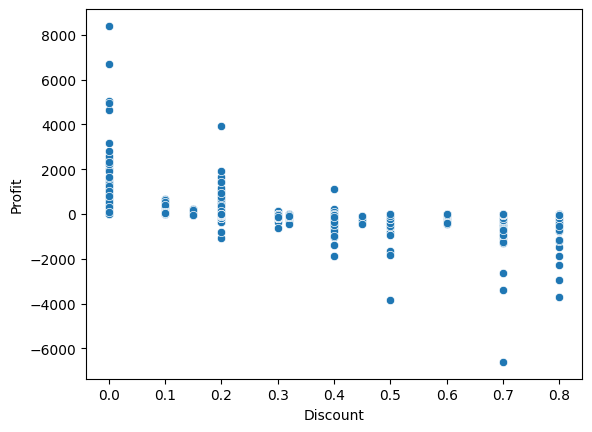

In [9]:
sns.scatterplot(x="Discount", y="Profit", data=df);

In the above visual, we look at a scatter plot showing the distribution of profits w.r.t discounts given

# 3. Univariate Anomaly Detection

Univariate is basically analysis done on a single attribute or feature. In this section, we will perform anomaly detection on a single attribute using the following methods.

- Statistical Process Control Methods (mean + 3sigma thresholding)
- Isolation Forest

We will start off by demonstrating both these techniques on the __`Sales`__ attribute and later on, you will implement similar techniques on the __`Profit`__ attribute.

## 3.1: Univariate Anomaly Detection on Sales using Statistical Modeling

Here we start off by implementing anomaly detecting using statistical modeling on the __`Sales`__ attribute

### Obtain Upper Limit Threshold for Sales

Here we are concerned about transactions with high sales values so we compute the upper limit using the $\mu$ + 3$\sigma$ rule where $\mu$ is the mean of the distribution and $\sigma$ is the standard deviation of the distribution.

In [10]:
mean_sales = df['Sales'].mean()
sigma_sales = df['Sales'].std()
three_sigma_sales = 3*sigma_sales

threshold_sales_value = mean_sales + three_sigma_sales
print('Threshold Sales:', threshold_sales_value)

Threshold Sales: 2099.593302356541


### Visualize Outlier Region

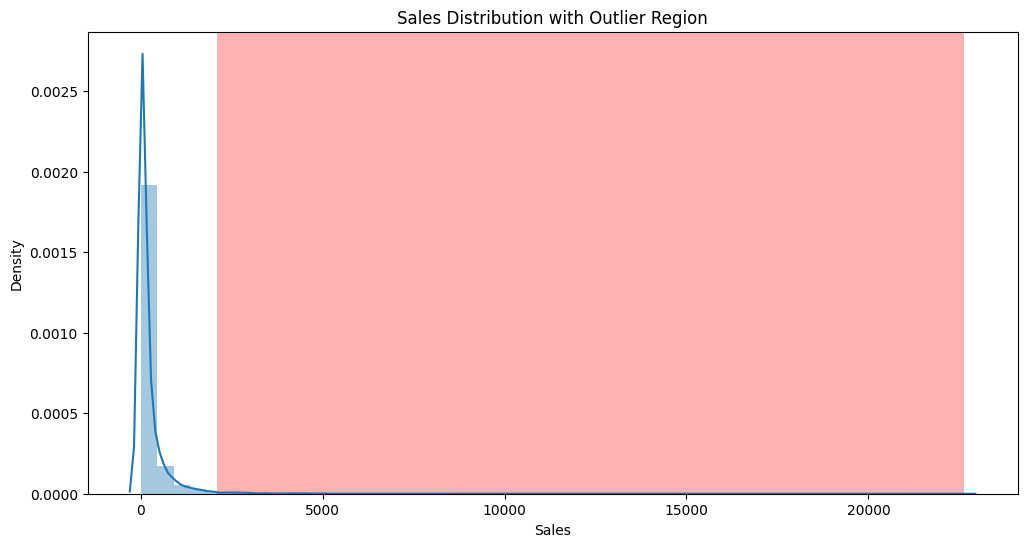

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

sns.distplot(df['Sales'])
plt.axvspan(threshold_sales_value, df['Sales'].max(), facecolor='r', alpha=0.3)
plt.title("Sales Distribution with Outlier Region");

### Filter and Sort Outliers

Here we filter out the outlier observations and sort by descending order and view the top 5 outlier values

In [12]:
sales_outliers_df = df['Sales'][df['Sales'] > threshold_sales_value]
print('Total Sales Outliers:', len(sales_outliers_df))
sales_outliers_sorted = sales_outliers_df.sort_values(ascending=False)
sales_outliers_sorted.head(5)

Total Sales Outliers: 127


2697    22638.480
6826    17499.950
8153    13999.960
2623    11199.968
4190    10499.970
Name: Sales, dtype: float64

### View Top 10 Outlier Transactions

In [13]:
(df.loc[sales_outliers_sorted.index.tolist()][['City', 'Category', 'Sub-Category', 'Product Name', 
                                              'Sales', 'Quantity', 'Discount', 'Profit']]).head(10)

,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,Jacksonville,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
6826,Lafayette,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
8153,Seattle,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808
2623,New York City,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
4190,Newark,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856
9039,Detroit,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,13,0.0,4946.3700
4098,Minneapolis,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950,5,0.0,4630.4755
4277,Lakewood,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.930,7,0.0,2365.9818
8488,Arlington,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,8749.950,5,0.0,2799.9840
6425,Philadelphia,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,8399.976,4,0.4,1119.9968


### View Bottom 10 Outlier Transactions

In [14]:
(df.loc[sales_outliers_sorted.index.tolist()][['City', 'Category', 'Sub-Category', 'Product Name', 
                                              'Sales', 'Quantity', 'Discount', 'Profit']]).tail(10)

,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
5300,Springfield,Furniture,Tables,Hon Rectangular Conference Tables,2275.500,10,0.0,386.8350
6101,New York City,Furniture,Chairs,Global Troy Executive Leather Low-Back Tilter,2254.410,5,0.1,375.7350
4881,Henderson,Technology,Accessories,Logitech diNovo Edge Keyboard,2249.910,9,0.0,517.4793
7487,Dover,Technology,Accessories,Logitech diNovo Edge Keyboard,2249.910,9,0.0,517.4793
1155,Harrisonburg,Furniture,Tables,"Chromcraft 48"" x 96"" Racetrack Double Pedestal...",2244.480,7,0.0,493.7856
8699,Nashville,Technology,Phones,Samsung Galaxy S III - 16GB - pebble blue (T-M...,2239.936,8,0.2,223.9936
9774,San Antonio,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928
8424,Lakewood,Furniture,Bookcases,"Global Adaptabilites Bookcase, Cherry/Storm Gr...",2154.900,5,0.0,129.2940
6534,Buffalo,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,2152.776,3,0.2,726.5619
8680,Richmond,Office Supplies,Appliances,Honeywell Enviracaire Portable HEPA Air Cleane...,2104.550,7,0.0,694.5015


## Q 3.2: Univariate Anomaly Detection on Profit using Statistical Modeling


### Obtain Upper Limit Threshold for Profit



In [15]:
mean_profit = df['Profit'].mean()
sigma_profit = df['Profit'].std()
three_sigma_profit = 3 * sigma_profit

threshold_profit_upper_limit = mean_profit + three_sigma_profit
threshold_profit_lower_limit = mean_profit - three_sigma_profit

print('Thresholds Profit:', threshold_profit_lower_limit, threshold_profit_upper_limit)


Thresholds Profit: -674.1234267650873 731.4372193806566


### Visualize Outlier Regions



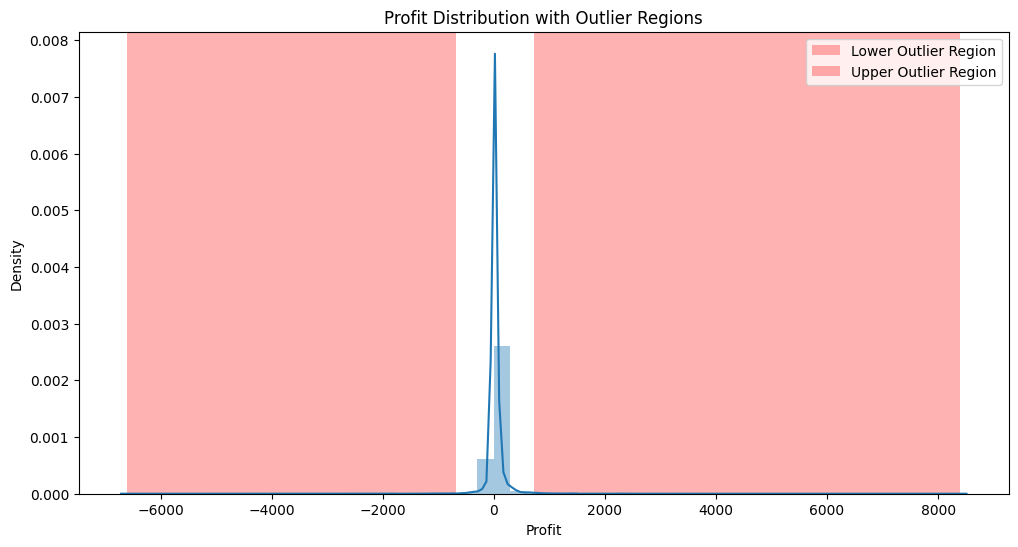

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.distplot(df['Profit'])
plt.axvspan(df['Profit'].min(), threshold_profit_lower_limit, facecolor='r', alpha=0.3, label='Lower Outlier Region')
plt.axvspan(threshold_profit_upper_limit, df['Profit'].max(), facecolor='r', alpha=0.3, label='Upper Outlier Region')
plt.title("Profit Distribution with Outlier Regions")
plt.legend()


### Filter and Sort Outliers



In [17]:
profit_outliers_df = df[(df['Profit'] > threshold_profit_upper_limit) | (df['Profit'] < threshold_profit_lower_limit)]
print('Total Profit Outliers:', len(profit_outliers_df))
profit_outliers_sorted = profit_outliers_df.sort_values(by='Profit', ascending=False)
profit_outliers_sorted.head(5)


Total Profit Outliers: 107


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6826,6827,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,5,0.0,8399.9760
8153,8154,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.96,4,0.0,6719.9808
4190,4191,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.97,3,0.0,5039.9856
9039,9040,CA-2016-117121,2016-12-17,2016-12-21,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Detroit,...,48205,Central,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.74,13,0.0,4946.3700
4098,4099,CA-2014-116904,2014-09-23,2014-09-28,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,Minneapolis,...,55407,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.95,5,0.0,4630.4755


### View Top 10 Outlier Transactions



In [18]:
# For the top 10 transactions based on highest profits:
top_10_profit = df.sort_values(by='Profit', ascending=False).head(10)
print(top_10_profit)

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
6826    6827  CA-2016-118689 2016-10-02 2016-10-09  Standard Class   
8153    8154  CA-2017-140151 2017-03-23 2017-03-25     First Class   
4190    4191  CA-2017-166709 2017-11-17 2017-11-22  Standard Class   
9039    9040  CA-2016-117121 2016-12-17 2016-12-21  Standard Class   
4098    4099  CA-2014-116904 2014-09-23 2014-09-28  Standard Class   
2623    2624  CA-2017-127180 2017-10-22 2017-10-24     First Class   
509      510  CA-2015-145352 2015-03-16 2015-03-22  Standard Class   
8488    8489  CA-2016-158841 2016-02-02 2016-02-04    Second Class   
7666    7667  US-2016-140158 2016-10-04 2016-10-08  Standard Class   
6520    6521  CA-2017-138289 2017-01-16 2017-01-18    Second Class   

     Customer ID         Customer Name      Segment        Country  \
6826    TC-20980          Tamara Chand    Corporate  United States   
8153    RB-19360          Raymond Buch     Consumer  United States   
4190    HL-15040   

### View Bottom 10 Outlier Transactions



In [19]:
# For the bottom 10 transactions based on lowest profits (highest losses):
bottom_10_profit = df.sort_values(by='Profit', ascending=True).head(10)
print(bottom_10_profit)

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
7772    7773  CA-2016-108196 2016-11-25 2016-12-02  Standard Class   
683      684  US-2017-168116 2017-11-04 2017-11-04        Same Day   
9774    9775  CA-2014-169019 2014-07-26 2014-07-30  Standard Class   
3011    3012  CA-2017-134845 2017-04-17 2017-04-23  Standard Class   
4991    4992  US-2017-122714 2017-12-07 2017-12-13  Standard Class   
3151    3152  CA-2015-147830 2015-12-15 2015-12-18     First Class   
5310    5311  CA-2017-131254 2017-11-19 2017-11-21     First Class   
9639    9640  CA-2015-116638 2015-01-28 2015-01-31    Second Class   
1199    1200  CA-2016-130946 2016-04-08 2016-04-12  Standard Class   
2697    2698  CA-2014-145317 2014-03-18 2014-03-23  Standard Class   

     Customer ID     Customer Name      Segment        Country          City  \
7772    CS-12505     Cindy Stewart     Consumer  United States     Lancaster   
683     GT-14635    Grant Thornton    Corporate  United States    Bur

## 3.3: Univariate Anomaly Detection on Sales using Isolation Forest



### Initialize and Train Model



In [20]:
from sklearn.ensemble import IsolationForest

sales_ifmodel = IsolationForest(n_estimators=100,
                                contamination=0.01)
sales_ifmodel.fit(df[['Sales']])

IsolationForest(contamination=0.01)

### Visualize Outlier Region

Here we visualize the outlier region in the data distribution

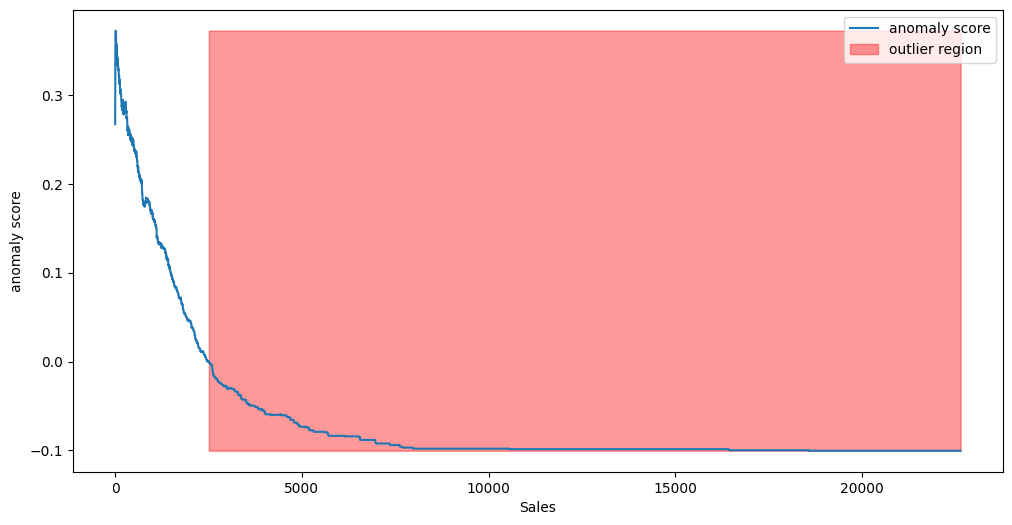

In [21]:
xx = np.linspace(df['Sales'].min(), df['Sales'].max(), len(df)).reshape(-1,1)
anomaly_score = sales_ifmodel.decision_function(xx)
outlier = sales_ifmodel.predict(xx)
plt.figure(figsize=(12, 6))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales');

### Filter and Sort Outliers



In [22]:
outlier_predictions = sales_ifmodel.predict(df[['Sales']])

sales_outliers_df = df[['Sales']]
sales_outliers_df['Outlier'] = outlier_predictions
sales_outliers_df = sales_outliers_df[sales_outliers_df['Outlier'] == -1]['Sales']

print('Total Sales Outliers:', len(sales_outliers_df))
sales_outliers_sorted = sales_outliers_df.sort_values(ascending=False)
sales_outliers_sorted.head(5)

Total Sales Outliers: 99


2697    22638.480
6826    17499.950
8153    13999.960
2623    11199.968
4190    10499.970
Name: Sales, dtype: float64

### View Top 10 Outlier Transactions

In [23]:
(df.loc[sales_outliers_sorted.index.tolist()][['City', 'Category', 'Sub-Category', 'Product Name', 
                                              'Sales', 'Quantity', 'Discount', 'Profit']]).head(10)

,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,Jacksonville,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
6826,Lafayette,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
8153,Seattle,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808
2623,New York City,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
4190,Newark,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856
9039,Detroit,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,13,0.0,4946.3700
4098,Minneapolis,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950,5,0.0,4630.4755
4277,Lakewood,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.930,7,0.0,2365.9818
8488,Arlington,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,8749.950,5,0.0,2799.9840
6425,Philadelphia,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,8399.976,4,0.4,1119.9968


### View Bottom 10 Outlier Transactions

In [24]:
(df.loc[sales_outliers_sorted.index.tolist()][['City', 'Category', 'Sub-Category', 'Product Name', 
                                              'Sales', 'Quantity', 'Discount', 'Profit']]).tail(10)

,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3986,Plainfield,Office Supplies,Storage,Tennsco 16-Compartment Lockers with Coat Rack,2591.560,4,0.0,621.9744
1805,Los Angeles,Technology,Phones,Samsung Galaxy Note 2,2575.944,7,0.2,257.5944
7474,Henderson,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078
6884,Minneapolis,Furniture,Chairs,Hon Pagoda Stacking Chairs,2567.840,8,0.0,770.3520
8271,New York City,Furniture,Chairs,Hon 4700 Series Mobuis Mid-Back Task Chairs wi...,2563.056,8,0.1,313.2624
3011,Louisville,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,2549.985,5,0.7,-3399.9800
6010,Los Angeles,Technology,Machines,Zebra GX420t Direct Thermal/Thermal Transfer P...,2548.560,6,0.2,286.7130
7280,Columbia,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,2541.980,2,0.0,1270.9900
263,Houston,Technology,Machines,Xerox WorkCentre 6505DN Laser Multifunction Pr...,2519.958,7,0.4,-251.9958
7937,Brentwood,Office Supplies,Appliances,Sanyo 2.5 Cubic Foot Mid-Size Office Refrigera...,2518.290,9,0.0,654.7554


## Q 3.4: Univariate Anomaly Detection on Profit using Isolation Forest

In this section you will use the learning from Section 3.3 and implement anomaly detecting using isolation on the __`Profit`__ attribute. Since we have both +ve (profits) and -ve (losses) values in the distribution, we will try to find anomalies for each.

### Initialize and Train Model


In [25]:
from sklearn.ensemble import IsolationForest

# Assuming 'df' is your DataFrame and 'feature' is the column you want to analyze for outliers
# Initialize the isolation forest model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
# Train the model
isolation_forest.fit(df[['Profit']].values)


IsolationForest(contamination=0.01, random_state=42)

### Visualize Outlier Regions



Text(0, 0.5, 'Anomaly Score')

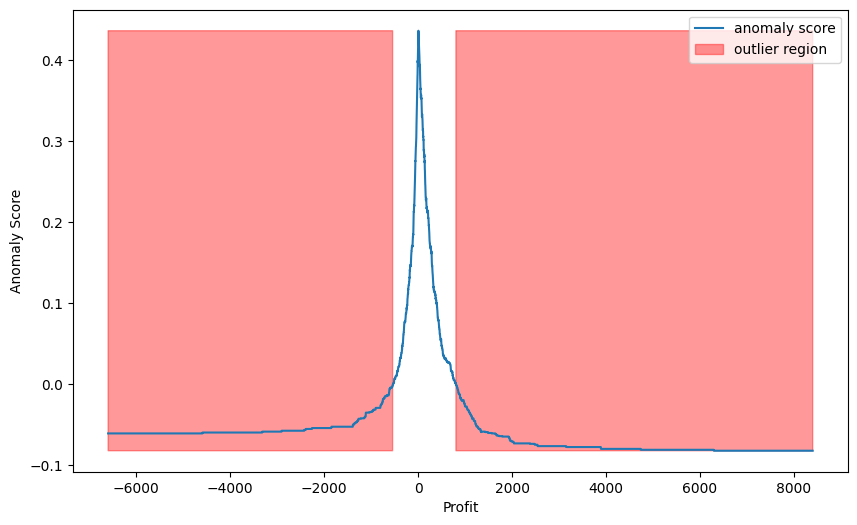

In [26]:
import numpy as np

# Generate a sequence of values from minimum to maximum 'feature' values
xx = np.linspace(df['Profit'].min(), df['Profit'].max(), len(df)).reshape(-1,1)

# Predict anomaly scores using the isolation forest model
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

# Visualize the outlier regions
plt.figure(figsize=(10, 6))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', alpha=0.4, label='outlier region')
plt.legend()
plt.xlabel('Profit')
plt.ylabel('Anomaly Score')


### Filter and Sort Outliers



In [27]:
# Predict outliers in the dataset
outliers_pred = isolation_forest.predict(df[['Profit']].values)

# Add a new column for outlier prediction
df['outlier'] = outliers_pred

# Filter out the outliers
outliers = df[df['outlier'] == -1]

# Sort the outliers by 'feature' in descending order and view the top 5
top_5_outliers = outliers.sort_values(by='Profit', ascending=False).head(5)
top_5_outliers


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,outlier
6826,6827,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,5,0.0,8399.9760,-1
8153,8154,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.96,4,0.0,6719.9808,-1
4190,4191,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.97,3,0.0,5039.9856,-1
9039,9040,CA-2016-117121,2016-12-17,2016-12-21,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Detroit,...,Central,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.74,13,0.0,4946.3700,-1
4098,4099,CA-2014-116904,2014-09-23,2014-09-28,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,Minneapolis,...,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.95,5,0.0,4630.4755,-1


### View Top 10 Outlier Transactions



In [28]:
# Assuming outliers have a certain flag or are filtered already, and 'Profit' is the column of interest
top_10_outliers_profit = df.sort_values(by='Profit', ascending=False).head(10)
top_10_outliers_profit


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,outlier
6826,6827,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760,-1
8153,8154,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,-1
4190,4191,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,-1
9039,9040,CA-2016-117121,2016-12-17,2016-12-21,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Detroit,...,Central,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,13,0.0,4946.3700,-1
4098,4099,CA-2014-116904,2014-09-23,2014-09-28,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,Minneapolis,...,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950,5,0.0,4630.4755,-1
2623,2624,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888,-1
509,510,CA-2015-145352,2015-03-16,2015-03-22,Standard Class,CM-12385,Christopher Martinez,Consumer,United States,Atlanta,...,South,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,6354.950,5,0.0,3177.4750,-1
8488,8489,CA-2016-158841,2016-02-02,2016-02-04,Second Class,SE-20110,Sanjit Engle,Consumer,United States,Arlington,...,South,TEC-MA-10001127,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,8749.950,5,0.0,2799.9840,-1
7666,7667,US-2016-140158,2016-10-04,2016-10-08,Standard Class,DR-12940,Daniel Raglin,Home Office,United States,Providence,...,East,TEC-CO-10001449,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,5399.910,9,0.0,2591.9568,-1
6520,6521,CA-2017-138289,2017-01-16,2017-01-18,Second Class,AR-10540,Andy Reiter,Consumer,United States,Jackson,...,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,5443.960,4,0.0,2504.2216,-1


### View Bottom 10 Outlier Transactions



In [29]:
# Assuming outliers have a certain flag or are filtered already, and 'Profit' is the column of interest
bottom_10_outliers_profit = df.sort_values(by='Profit', ascending=True).head(10)
bottom_10_outliers_profit


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,outlier
7772,7773,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780,-1
683,684,US-2017-168116,2017-11-04,2017-11-04,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,...,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904,-1
9774,9775,CA-2014-169019,2014-07-26,2014-07-30,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,...,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928,-1
3011,3012,CA-2017-134845,2017-04-17,2017-04-23,Standard Class,SR-20425,Sharelle Roach,Home Office,United States,Louisville,...,West,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,2549.985,5,0.7,-3399.9800,-1
4991,4992,US-2017-122714,2017-12-07,2017-12-13,Standard Class,HG-14965,Henry Goldwyn,Corporate,United States,Chicago,...,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,1889.990,5,0.8,-2929.4845,-1
3151,3152,CA-2015-147830,2015-12-15,2015-12-18,First Class,NF-18385,Natalie Fritzler,Consumer,United States,Newark,...,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,1799.994,2,0.7,-2639.9912,-1
5310,5311,CA-2017-131254,2017-11-19,2017-11-21,First Class,NC-18415,Nathan Cano,Consumer,United States,Houston,...,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.7820,-1
9639,9640,CA-2015-116638,2015-01-28,2015-01-31,Second Class,JH-15985,Joseph Holt,Consumer,United States,Concord,...,South,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124,-1
1199,1200,CA-2016-130946,2016-04-08,2016-04-12,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,...,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1088.792,4,0.8,-1850.9464,-1
2697,2698,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784,-1


# 4. Multivariate Anomaly Detection

Multivariate is basically analysis done on more than one attribute or feature at a time. In this section, we will perform anomaly detection on two attributes (__`Discount`__ & __`Profit`__) using the following methods.

- Clustering Based Local Outlier Factor (CBLOF)
- Isolation Forest
- Auto-Encoders



In [30]:
!pip install pyod

## Extract Subset Data for Outlier Detection

In [31]:
cols = ['Discount', 'Profit']
subset_df = df[cols]
subset_df.head()

,Discount,Profit
0,0.00,41.9136
1,0.00,219.5820
2,0.00,6.8714
3,0.45,-383.0310
4,0.20,2.5164


## Feature Scaling

In [32]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler(feature_range=(0, 1))
subset_df[cols] = mms.fit_transform(subset_df)
subset_df.head()

,Discount,Profit
0,0.0000,0.442794
1,0.0000,0.454639
2,0.0000,0.440458
3,0.5625,0.414464
4,0.2500,0.440168


## 4.1: Multivariate Anomaly Detection with Clustering Based Local Outlier Factor (CBLOF)

The CBLOF model takes as an input the dataset and the cluster model that was generated by a clustering algorithm. It classifies the clusters into small clusters and large clusters using the parameters alpha and beta. The anomaly score is then calculated based on the size of the cluster the point belongs to as well as the distance to the nearest large cluster.



### Initialize and Train Model

Here we initialize the CBLOF model with some hyperparameters assuming the proportion of outliers to be 1% of the total data (using the `contamination` setting)

In [33]:
from pyod.models import cblof

cblof_model = cblof.CBLOF(contamination=0.01, random_state=42)
cblof_model.fit(subset_df)

CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.01, n_clusters=8, n_jobs=None, random_state=42,
   use_weights=False)

### Filter and Sort Outliers

Here we predict outliers in our dataset using our trained model and filter out the outlier observations and sort by descending order and view the top 5 outlier values

In [34]:
outlier_predictions = cblof_model.predict(subset_df)

outliers_df = subset_df.copy(deep=True)
outliers_df['Outlier'] = outlier_predictions
outliers_df = outliers_df[outliers_df['Outlier'] == 1]

print('Total Outliers:', len(outliers_df))
outliers_sorted = outliers_df.sort_values(by=['Profit', 'Discount'], ascending=False)
outliers_sorted.head(5)

Total Outliers: 100


,Discount,Profit,Outlier
6826,0.0,1.000000,1
8153,0.0,0.888000,1
4190,0.0,0.776000,1
9039,0.0,0.769759,1
4098,0.0,0.748699,1


### View Bottom 10 Outlier Transactions

In [35]:
(df.loc[outliers_sorted.index.tolist()][['City', 'Category', 'Sub-Category', 'Product Name', 
                                              'Sales', 'Quantity', 'Discount', 'Profit']]).tail(10)

,City,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
463,Phoenix,Furniture,Tables,Bush Advantage Collection Racetrack Conference...,1272.630,6,0.5,-814.4832
4128,Charlotte,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,2624.985,3,0.5,-944.9946
8993,Columbia,Furniture,Tables,Balt Solid Wood Round Tables,1875.258,7,0.4,-968.8833
5320,Knoxville,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,2314.116,7,0.4,-1002.7836
165,San Antonio,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,8159.952,8,0.4,-1359.9920
27,Philadelphia,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430,7,0.5,-1665.0522
2697,Jacksonville,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
9639,Concord,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124
683,Burlington,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904
7772,Lancaster,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780


We can definitely see some huge losses incurred based on giving higher discounts even if the sales amount was high which is interesting as well as concerning.

## Q 4.2: Multivariate Anomaly Detection with Isolation Forest

Here you will detect anomalies using the Isolation Forest model and use the learnings from 4.1. Here you will use the [`pyod`](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.iforest) version of [Isolation Forest](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.iforest) which is basically a wrapper over the `scikit-learn` version but with more functionalities.

### Initialize and Train Model



In [36]:
from pyod.models import iforest

# Let's assume your DataFrame 'df' has columns 'Sales' and 'Profit' which you want to use for anomaly detection
# First, select these columns to create your feature set 'X'
X = df[['Sales', 'Profit']]

# Now, initialize and train your Isolation Forest model with the selected features
from pyod.models import iforest

if_model = iforest.IForest(contamination=0.01, random_state=42)
if_model.fit(X)


IForest(behaviour='old', bootstrap=False, contamination=0.01,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=1,
    random_state=42, verbose=0)

### Filter and Sort Outliers



In [37]:
from pyod.models import iforest

# Assuming 'df' is your DataFrame and 'features' are the columns you want to analyze for anomalies
# Selecting the relevant features from your DataFrame
features = df[['Discount', 'Profit']]  # Replace with the actual feature names

# Initialize the Isolation Forest model
if_model = iforest.IForest(contamination=0.01, random_state=42)

# Fit the model to the data
if_model.fit(features)

# Predict the outliers in the dataset
outliers_pred = if_model.predict(features)

# Calculate the anomaly scores (the lower, the more abnormal)
anomaly_scores = if_model.decision_function(features)

# Add the predictions and scores to the DataFrame
df['outlier'] = outliers_pred
df['outlier_score'] = anomaly_scores

# Filter the DataFrame for outliers
outliers = df[df['outlier'] == 1]  # Note: In some implementations, 1 indicates an outlier

# Sort the outliers by their anomaly scores in descending order (most anomalous first)
sorted_outliers = outliers.sort_values(by='outlier_score', ascending=False)

# View the top 5 outlier values
top_5_outliers = sorted_outliers.head(5)

# View the top 5 outlier values
top_5_outliers



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,outlier,outlier_score
4991,4992,US-2017-122714,2017-12-07,2017-12-13,Standard Class,HG-14965,Henry Goldwyn,Corporate,United States,Chicago,...,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,1889.990,5,0.8,-2929.4845,1,0.080979
9774,9775,CA-2014-169019,2014-07-26,2014-07-30,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,...,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928,1,0.080979
1199,1200,CA-2016-130946,2016-04-08,2016-04-12,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,...,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1088.792,4,0.8,-1850.9464,1,0.079361
5310,5311,CA-2017-131254,2017-11-19,2017-11-21,First Class,NC-18415,Nathan Cano,Consumer,United States,Houston,...,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.7820,1,0.079361
3324,3325,CA-2014-165309,2014-11-11,2014-11-15,Standard Class,KD-16270,Karen Daniels,Consumer,United States,Houston,...,OFF-BI-10001359,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,896.990,5,0.8,-1480.0335,1,0.077747


### View Bottom 10 Outlier Transactions



In [38]:
# View the bottom 10 transactions considered as outliers
bottom_10_outliers = sorted_outliers.tail(10)

# Show the results
print("Top 5 Outliers:\n", top_5_outliers)
print("\nBottom 10 Outlier Transactions:\n", bottom_10_outliers)

Top 5 Outliers:
       Row ID        Order ID Order Date  Ship Date       Ship Mode  \
4991    4992  US-2017-122714 2017-12-07 2017-12-13  Standard Class   
9774    9775  CA-2014-169019 2014-07-26 2014-07-30  Standard Class   
1199    1200  CA-2016-130946 2016-04-08 2016-04-12  Standard Class   
5310    5311  CA-2017-131254 2017-11-19 2017-11-21     First Class   
3324    3325  CA-2014-165309 2014-11-11 2014-11-15  Standard Class   

     Customer ID     Customer Name    Segment        Country         City  \
4991    HG-14965     Henry Goldwyn  Corporate  United States      Chicago   
9774    LF-17185       Luke Foster   Consumer  United States  San Antonio   
1199    ZC-21910  Zuschuss Carroll   Consumer  United States      Houston   
5310    NC-18415       Nathan Cano   Consumer  United States      Houston   
3324    KD-16270     Karen Daniels   Consumer  United States      Houston   

      ...       Product ID         Category Sub-Category  \
4991  ...  OFF-BI-10001120  Office Supp

## Q 4.3: Multivariate Anomaly Detection with Auto-encoders



### Initialize Model

Here we initiaze an auto-encoder network with a few hidden layers so that we could train it for a 100 epochs

In [39]:
from pyod.models import auto_encoder

ae_model = auto_encoder.AutoEncoder(hidden_neurons=[2, 32, 32, 2], 
                                    hidden_activation='relu',
                                    output_activation='sigmoid',
                                    epochs=100,
                                    batch_size=32,
                                    contamination=0.01)

### Train Model

__Your turn:__ Train the model by calling the `fit()` function on the right data

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Example: Loading your dataset
# Replace 'your_data.csv' with the actual file path
df = pd.read_excel("Superstore.xls")

# Preprocess your data: This step will vary based on your dataset
# Example: Selecting numerical features for training
X = df.select_dtypes(include=['float64', 'int64'])

# It's often a good idea to scale your data for neural network models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets (if you need a test set)
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)
# Train the AutoEncoder
ae_model.fit(X_train)



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              14 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,334 (5.21 KB)

 Trainable params: 1,334 (5.21 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 14.9409 - val_loss: 9.0436
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.1918 - val_loss: 6.1492
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.1630 - val_loss: 4.6449
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.4343 - val_loss: 3.6748
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.2052 - val_loss: 2.9975
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.0816 - val_loss: 2.5382
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8282 - val_loss: 2.1953
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4595 - val_loss: 1.9526
Epoch 9/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8724 - val_loss: 1.7660
Epoch 10/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6545 - val_loss: 1.6251
Epoch 11/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6354 - val_loss: 1.5155
Epoch 12/100
225/225 ━━━━━━━━━━━━━━

AutoEncoder(batch_size=32, contamination=0.01, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[2, 32, 32, 2],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x000002C67D593CE0>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

### Filter and Sort Outliers



In [41]:
# Get outlier scores for the training data
outlier_scores = ae_model.decision_function(X_train)

# Predict if an observation is an outlier (1) or inlier (0)
outlier_labels = ae_model.predict(X_train)

# Create a DataFrame from X_train to work with columns
# Note: We need to convert X_train from numpy array to DataFrame and use the original column names
df_train = pd.DataFrame(X_train, columns=X.columns)
df_train['outlier_score'] = outlier_scores
df_train['is_outlier'] = outlier_labels

# Filter out the outliers
outliers = df_train[df_train['is_outlier'] == 1]

# Sort the outliers by their outlier score in descending order
sorted_outliers = outliers.sort_values(by='outlier_score', ascending=False)

# Display the top 5 outliers
top_5_outliers = sorted_outliers.head(5)
print(top_5_outliers)




250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step
        Row ID  Postal Code      Sales  Quantity  Discount     Profit  \
3429  0.634138    -0.227227  27.711339  0.544012 -0.756643  35.736934   
1064  1.094100     1.338797  22.095306  0.094574 -0.756643  28.565080   
1910  0.962039    -0.376157   6.851784  0.544012  2.634145 -28.297462   
1340 -0.279548    -1.106584  16.479273 -0.354865 -0.756643  21.393226   
6560  1.401204    -0.217870  15.504920  4.139520 -0.756643  20.993584   

      outlier_score  is_outlier  
3429      46.103981           1  
1064      36.849839           1  
1910      29.004983           1  
1340      27.549861           1  
6560      26.917092           1  


### View Bottom 10 Outlier Transactions



In [42]:
bottom_10_outliers = df_train.sort_values(by='outlier_score', ascending=True).head(10)

print(bottom_10_outliers)

        Row ID  Postal Code     Sales  Quantity  Discount    Profit  \
1986 -0.005373     0.169035 -0.338276  0.094574  0.212153 -0.128432   
7116  0.145060     0.170376 -0.335554  0.094574  0.212153 -0.091353   
3584  0.025130    -0.218557 -0.100003 -0.354865 -0.272245  0.036598   
2119  0.196706     0.169035 -0.337608  0.094574  0.212153 -0.112992   
771   0.413342     0.150509  0.247077  0.094574  0.212153  0.082490   
5337 -0.006066     0.169035 -0.335824 -0.354865  0.212153 -0.115750   
1017 -0.257364     0.182197 -0.267237 -0.354865  0.212153 -0.034495   
7898  0.310397     0.169035 -0.237931 -0.354865  0.212153 -0.113629   
4478 -0.387692     0.228638 -0.289188  0.094574  0.212153 -0.106445   
7446  0.188734     0.170376 -0.332974 -0.354865  0.212153 -0.111605   

      outlier_score  is_outlier  
1986       0.477147           0  
7116       0.486981           0  
3584       0.507549           0  
2119       0.510132           0  
771        0.567265           0  
5337       0.5

## 4.4: Visualize Anomalies and Compare Anomaly Detection Models

Here we will look at the visual plots of anomalies as detected by the above three models

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 2)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 2)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,242 (4.85 KB)

 Trainable params: 1,242 (4.85 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10.7546 - val_loss: 3.9725
Epoch 2/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.8690 - val_loss: 2.5379
Epoch 3/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.6398 - val_loss: 1.9677
Epoch 4/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0166 - val_loss: 1.6739
Epoch 5/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1551 - val_loss: 1.4962
Epoch 6/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5405 - val_loss: 1.3801
Epoch 7/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4553 - val_loss: 1.2981
Epoch 8/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1143 - val_loss: 1.2386
Epoch 9/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3894 - val_loss: 1.1935
Epoch 10/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3239 - val_loss: 1.1557
Epoch 11/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0605 - val_loss: 1.1286
Epoch 12/100
282/282 ━━━━━━━━━━━━━━

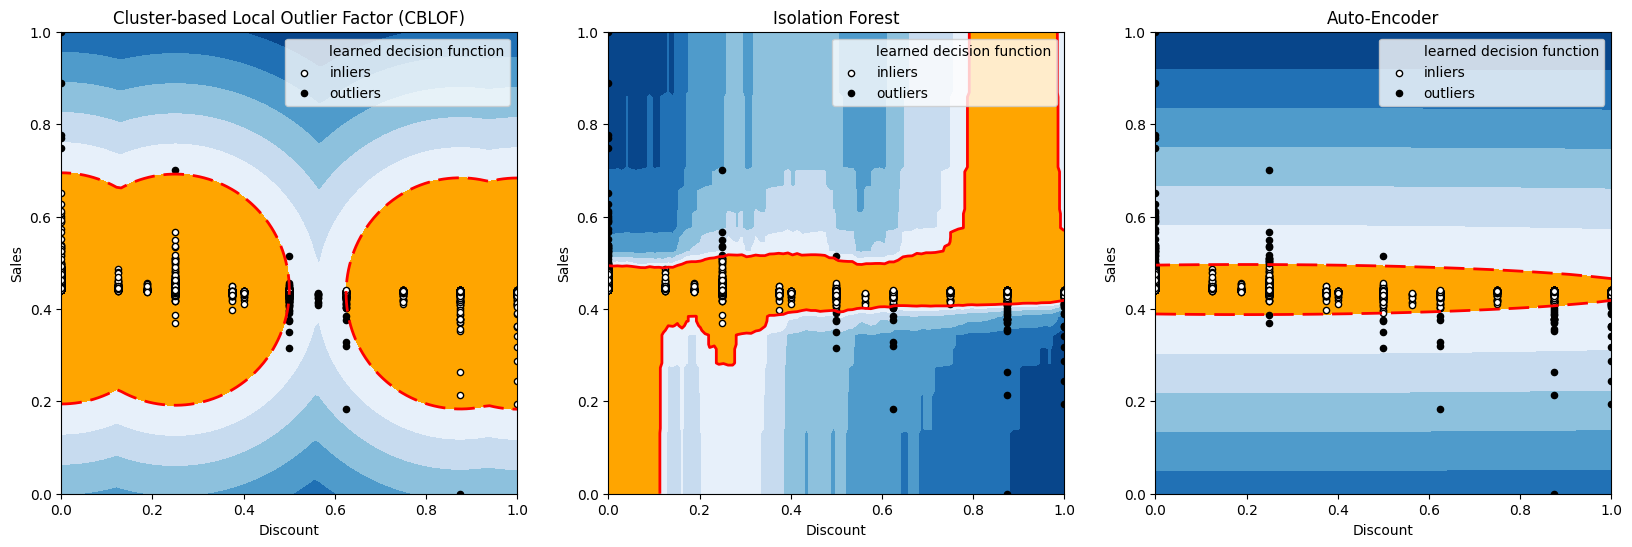

In [45]:
import numpy as np
import matplotlib.pyplot as plt

outliers_fraction = 0.01

# Assuming subset_df is defined
# Assuming cblof_model, if_model, and ae_model are defined

def visualize_anomalies(model, xx, yy, data_df, ax_obj, subplot_title):
    model.fit(data_df)  # Fit the model to the data
    
    scores_pred = model.decision_function(data_df) * -1
    y_pred = model.predict(data_df)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)

    out_df = data_df.copy(deep=True)
    out_df['Outlier'] = y_pred.tolist()
    inliers_discount = out_df[out_df['Outlier'] == 0]['Discount'].values
    inliers_profit = out_df[out_df['Outlier'] == 0]['Profit'].values
    outliers_discount = out_df[out_df['Outlier'] == 1]['Discount'].values
    outliers_profit = out_df[out_df['Outlier'] == 1]['Profit'].values

    threshold = np.percentile(scores_pred, 100 * outliers_fraction)
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)

    ax_obj.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7), cmap=plt.cm.Blues_r)
    a = ax_obj.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='red')
    ax_obj.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='orange')
    b = ax_obj.scatter(inliers_discount, inliers_profit, c='white', s=20, edgecolor='k')
    c = ax_obj.scatter(outliers_discount, outliers_profit, c='black', s=20, edgecolor='k')

    ax_obj.legend([a.collections[0], b, c], ['learned decision function', 'inliers', 'outliers'],
               prop=plt.matplotlib.font_manager.FontProperties(size=10), loc='upper right')

    ax_obj.set_xlim((0, 1))
    ax_obj.set_ylim((0, 1))
    ax_obj.set_xlabel('Discount')
    ax_obj.set_ylabel('Sales')
    ax_obj.set_title(subplot_title)

xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax_objs = [ax[0], ax[1], ax[2]]
models = [cblof_model, if_model, ae_model]
plot_titles = ['Cluster-based Local Outlier Factor (CBLOF)',
               'Isolation Forest',
               'Auto-Encoder']

for ax_obj, model, plot_title in zip(ax_objs, models, plot_titles):
    visualize_anomalies(model=model,
                        xx=xx, yy=yy,
                        data_df=subset_df,
                        ax_obj=ax_obj,
                        subplot_title=plot_title)

plt.axis('tight')
plt.show()
